In [18]:
## By Jennifer Hill, 2021
## Plot 90th percentile of internalization vs double bound crosslinks for varying internalization spring constants

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# set directory path names
working_dir = '/Users/jenniferhill/Documents/tubeZsavio/experiments/'
output_dir = working_dir + 'longbudtime_1000pN_output_11968314/'

# import bud_positions.pkl and xlinks_state.pkl from CME_reporting_v2.ipynb
solid_positions = pd.read_pickle(output_dir+'/dataframes/bud_positions.pkl')
xlinks_state = pd.read_pickle(output_dir+'/dataframes/xlinks_state.pkl')

# set internalization spring constant for run group
int_force = 1000

## Make dataframes for each unique run group

In [19]:
# generate dataframe combining internalization spring constant, solid position, and # of double bound xlinks

# group internalization column by run, take 90th percentile, convert to dataframe
solid_position_quantile = solid_positions['internalization'].groupby('run').quantile(.90).to_frame()

# group AA (double bound) column by run, take the value in the last row, convert to dataframe
final_active_xlinks = xlinks_state.groupby('run')['AA'].last().to_frame()

# concatenate active xlinks df to solid position df along column axis
solid_position_pre_summary = pd.concat([solid_position_quantile, final_active_xlinks], axis=1)

# add a column for internalization spring force
solid_position_pre_summary.insert(0, "int_force", int_force)

solid_position_pre_summary

,int_force,internalization,AA
run,,,
run0000_0000,1000,44.57427,344
run0000_0001,1000,41.07298,363
run0000_0002,1000,34.09040,354
run0000_0003,1000,41.93878,353
run0000_0004,1000,43.87049,356
...,...,...,...
run0013_0000,1000,67.65954,1468
run0013_0001,1000,65.68075,1449
run0013_0002,1000,55.37125,1366


In [10]:
# save dataframe to output directory
solid_position_pre_summary.to_pickle(output_dir+'dataframes/solid_pos_vs_active_xlinks.pkl')

# repeat for all run groups before proceeding to next step

## Combine and plot data from all run groups

In [6]:
#generate a summary df containing all int_forces, 90th percentile internalizations, and double bound xlinks

import os

# set directory path names
working_dir = working_dir = '/Users/jenniferhill/Documents/tubeZsavio/experiments/'
experiment_name = 'longbudtime'

all_solid_position_param_summaries = []
n=0

# load solid_pos_vs_active_xlinks.pkl for each run group and add to list
directories = []
for directory in os.listdir(working_dir):
    if directory.startswith(experiment_name):
        directories.append(directory)
        solid_position_param_summary = pd.read_pickle(working_dir+directory+'/dataframes/solid_pos_vs_active_xlinks.pkl')
        all_solid_position_param_summaries.append(solid_position_param_summary)
        n+=1

# concatenate all run groups into a single dataframe
solid_position_summary = pd.concat(all_solid_position_param_summaries)
solid_position_summary

,int_force,zpos,AA,internalization
run,,,,
run0000_0000,2000,37.2354,352,NaN
run0000_0001,2000,29.0216,358,NaN
run0000_0002,2000,26.9918,335,NaN
run0000_0003,2000,24.2075,360,NaN
run0000_0004,2000,38.7527,357,NaN
...,...,...,...,...
run0003_0000,1400,37.0916,257,NaN
run0003_0001,1400,36.2132,265,NaN
run0003_0002,1400,38.4763,268,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

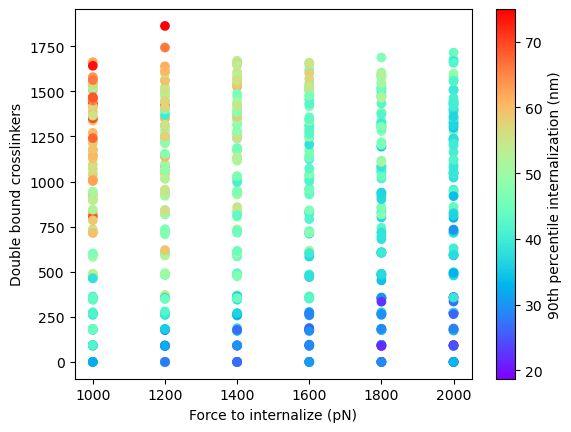

In [20]:
#plot internalization vs. double bound xlinks vs. internalization force
plt.scatter(solid_position_summary['int_force'], solid_position_summary['AA'], c=solid_position_summary['internalization'], cmap = cm.rainbow)
plt.colorbar(label = '90th percentile internalization (nm)')
plt.xlabel('Force to internalize (pN)')
plt.ylabel('Double bound crosslinkers')
plt.show

In [87]:
solid_position_summary.to_csv(working_dir+'summary_'+experiment_name+'/solid_pos_vs_active_xlinks_summary.csv')

In [3]:
print('All done!')

All done!
